# How the current work done is Sufficient for the Iteration

The current version includes several key components that establish a good foundation:

1.Data loading and exploration: I have included basic EDA, checked the class distribution, and visualized transaction patterns.
2.Initial preprocessing: I scaled the amount and time features appropriately.
3.Baseline models: We have implemented both Logistic Regression and Random Forest with appropriate handling for class imbalance.
4.Advanced technique: We already have SMOTE for addressing the imbalance problem.
5.Model evaluation: I am using comprehensive evaluation metrics including classification reports, ROC curves, and precision-recall curves.
6.Feature importance analysis: Included visualization of feature importance from the Random Forest model.

This covers all the essential elements needed to establish a baseline for my fraud detection system. It demonstrates that I understand the problem, have implemented appropriate evaluation metrics, and have considered the class imbalance issue.
In my personal opinion, for an Iteration Zero, this is more than sufficient. Many initial iterations might only include a single model without addressing class imbalance or proper evaluation metrics. The current implementation presented already goes beyond that by tackling several of the critical challenges in fraud detection.

## ML (Machine Learning)
The current Iteration shows strong evidence of machine learning implementation:

Built multiple models (Logistic Regression and Random Forest)
Addressed class imbalance using both class weights and SMOTE
Properly evaluated models with classification reports, ROC curves, and precision-recall curves
Implemented feature importance analysis

## DAIA (Data Analysis and Insights/Analytics)
The current code shows good coverage of data analysis:

Exploratory data analysis with visualizations of transaction amounts and time distributions
Analysis of feature distributions by class
Correlation analysis with heatmap
Class distribution and imbalance analysis
Visualization of model performance comparisons

## SI (System Implementation)
This might be the area with the least explicit coverage in the current early Iteration:

The code is structured and includes preprocessing steps
We have visualization capabilities built in

# Next Steps
After getting a better understanding of the current data I plan to use other datasetes as well but the current next steps with for the credit card fraud dataset
1. Deeper Feature Analysis
Certain features (especially V1, V3, V4, V10, V14) show clear differences between legitimate and fraudulent transactions:

Feature correlation with fraud: Calculate the correlation of each feature with the target variable to identify the strongest predictors
Feature interactions: Investigate if combinations of features provide stronger signals (e.g., ratios between features that show opposite patterns for fraud)
Time patterns: Analyze if fraud transactions occur at specific times by converting the Time feature to hours/days

2. Anomaly Detection Approach
Since fraud is rare, try anomaly detection techniques alongside your classification models:

3. Create New Features from Existing Ones
Engineer new features that might improve detection:


Loading dataset...

Dataset Information:
Shape: (284807, 31)

Sample data:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  

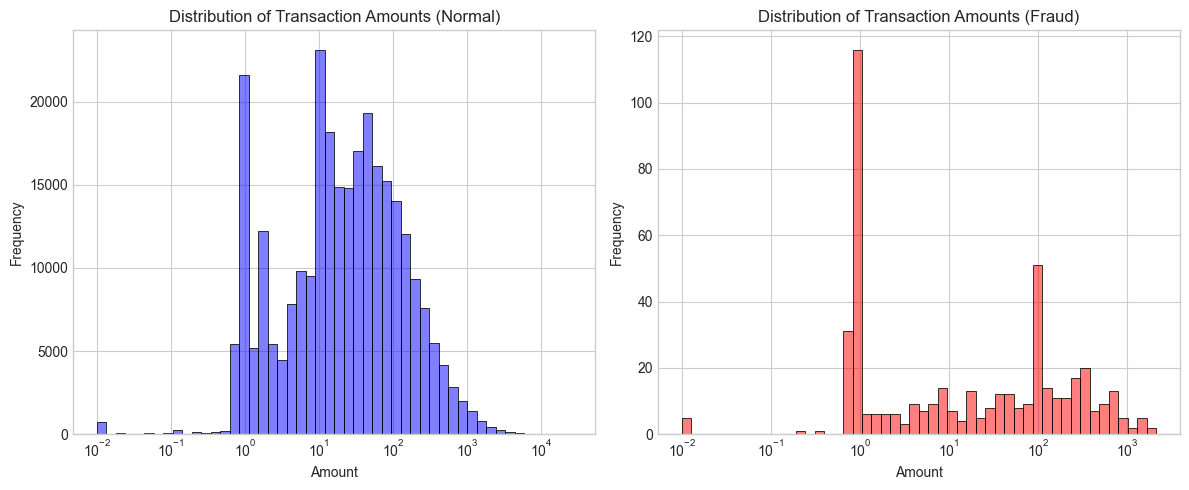

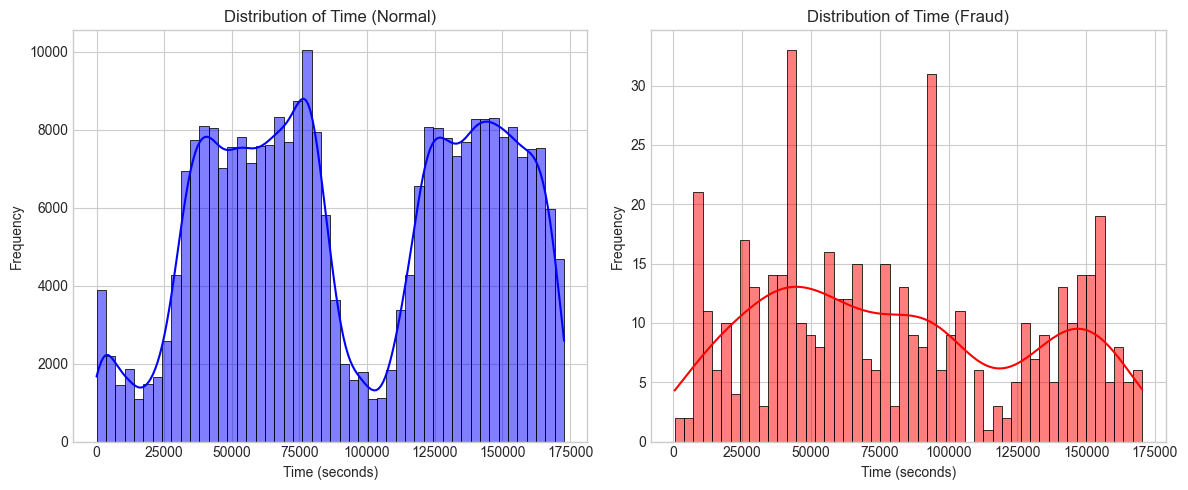

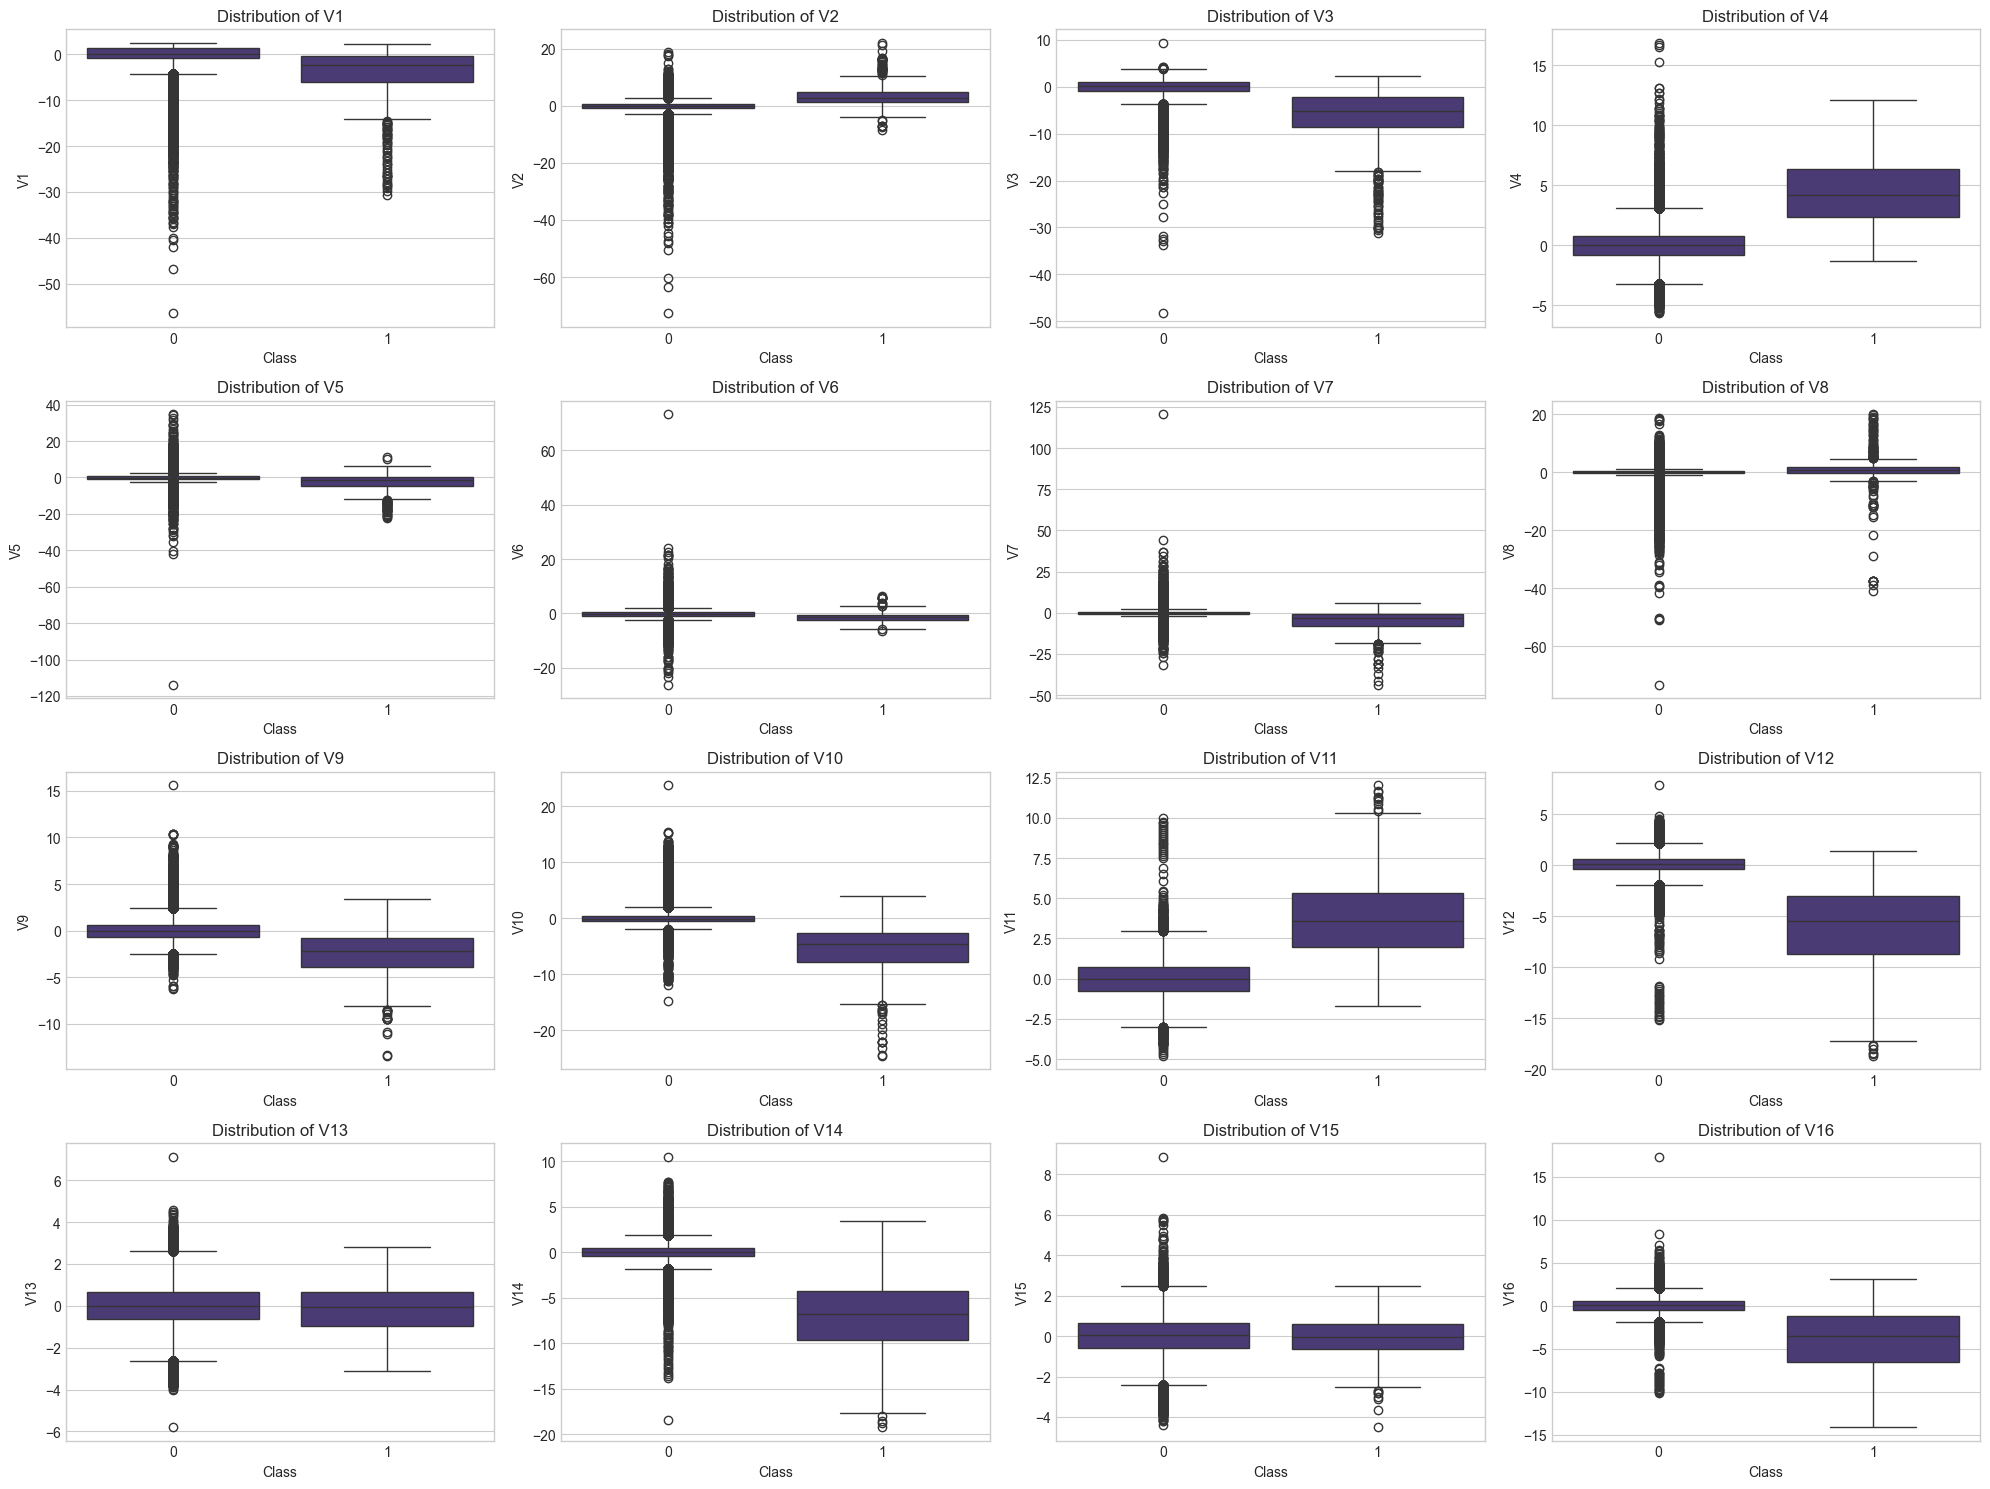

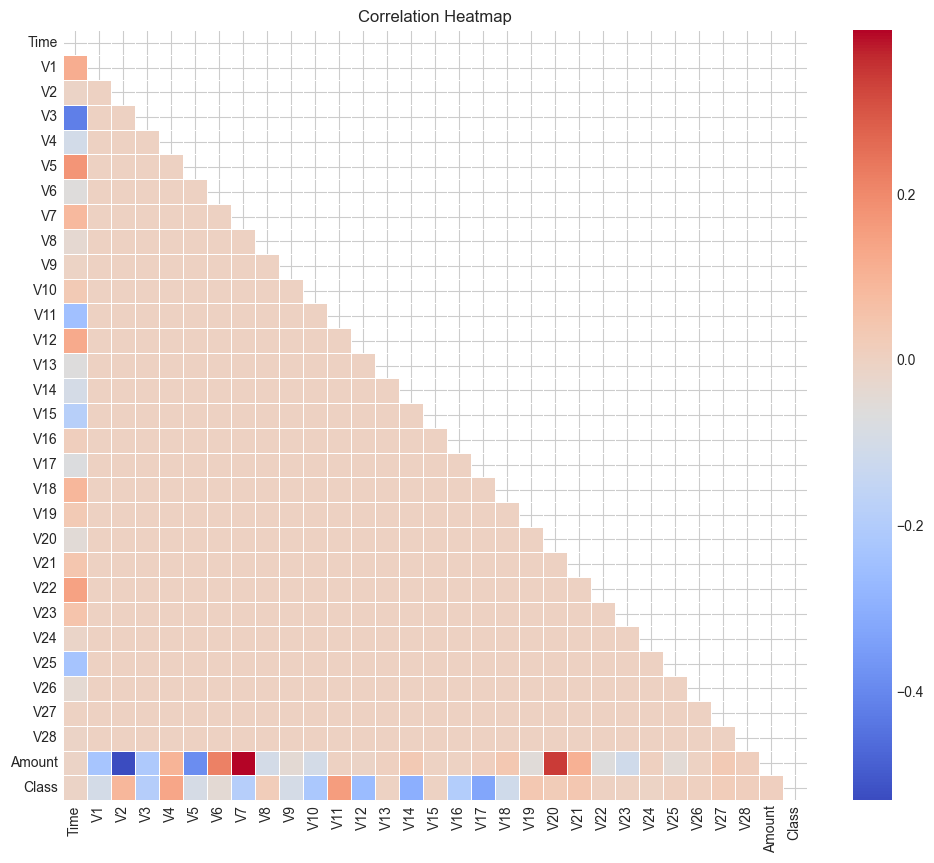


Preprocessing data...
Training set shape: (227845, 30)
Testing set shape: (56962, 30)

Training baseline Logistic Regression model...

Logistic Regression Results:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962


Training Random Forest model...

Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.82      0.81        98

    accuracy                           1.00     56962
   macro avg       0.90      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962


Applying SMOTE for handling class imbalance...
Original training set shape: (227845, 30)
Resampled training set shape: (454

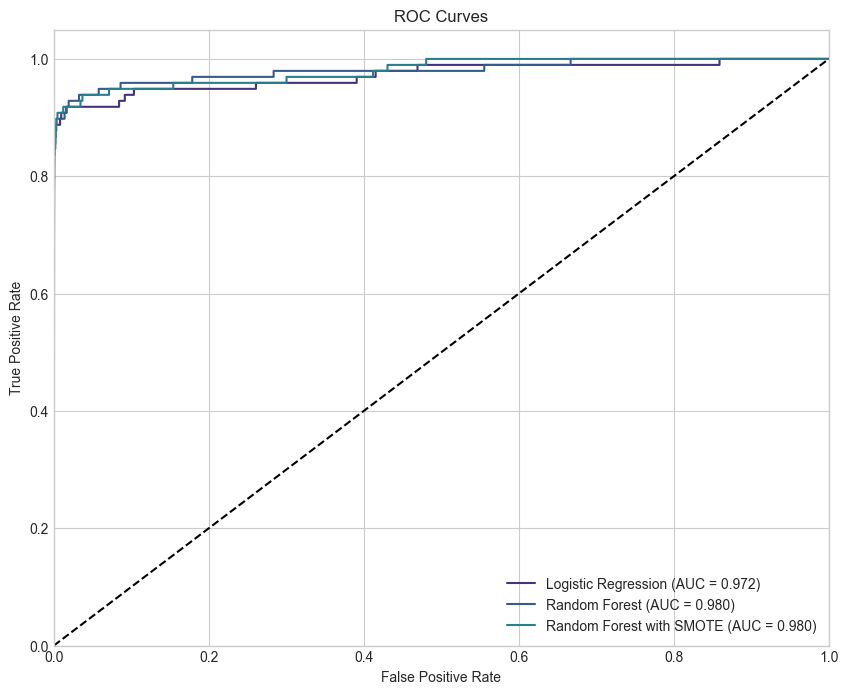

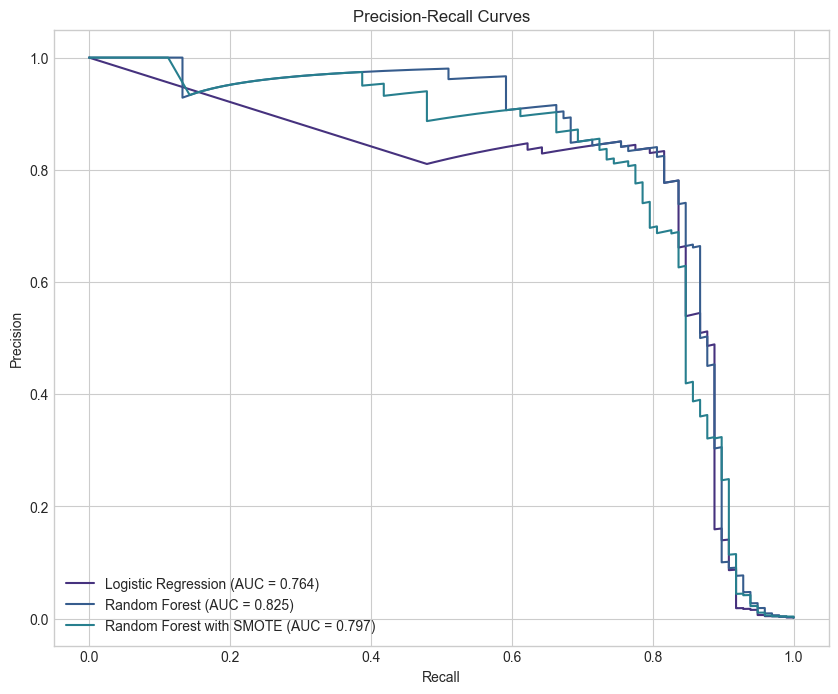


Analyzing feature importance...


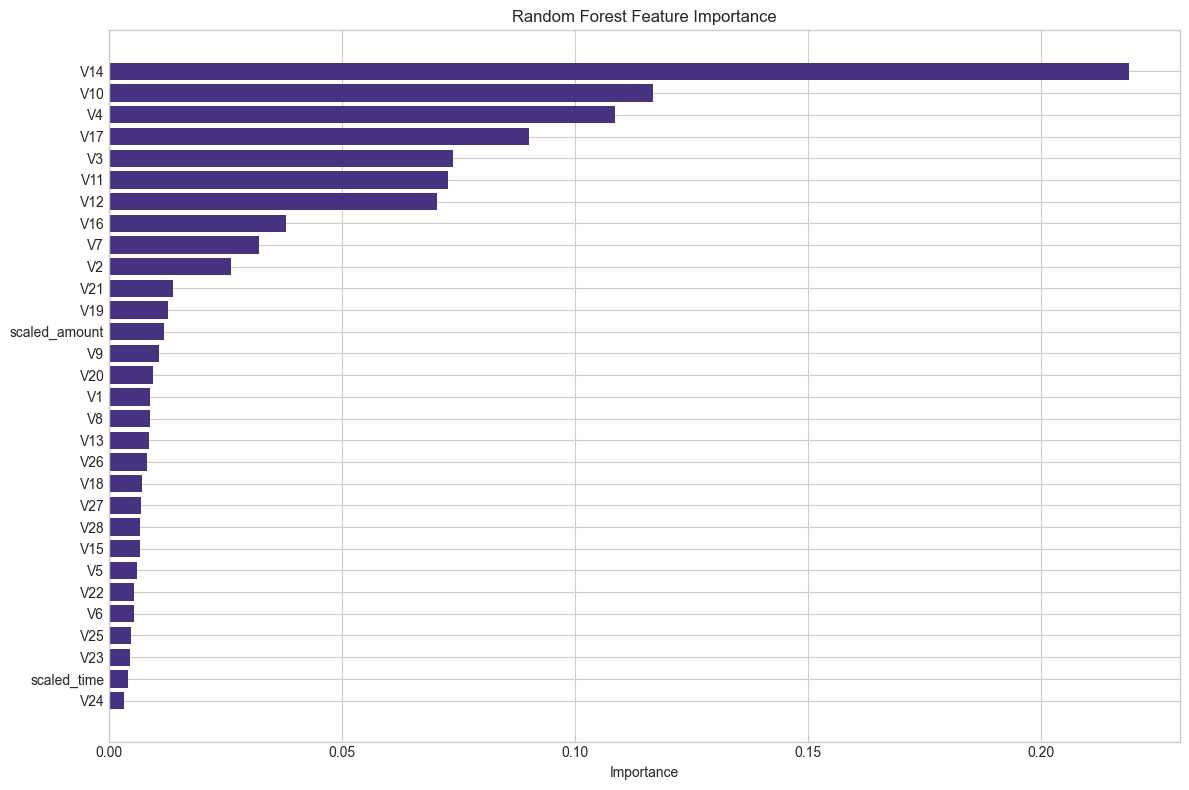

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
print("Loading dataset...")
data = pd.read_csv('C:/Users/Lachezar Mitov/Desktop/AI/fraud-detection-project/data/creditcard.csv')
print("\nDataset Information:")
print(f"Shape: {data.shape}")
print(f"\nSample data:")
print(data.head())
print("\nClass distribution:")
class_counts = data['Class'].value_counts()
print(class_counts)
fraud_percentage = class_counts[1] / len(data) * 100
print(f"Fraud transactions: {fraud_percentage:.4f}% of the dataset")


print("\nCreating visualizations...")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data[data['Class'] == 0]['Amount'], kde=True, color='blue', log_scale=True, 
             bins=50, label='Normal')
plt.title('Distribution of Transaction Amounts (Normal)')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data[data['Class'] == 1]['Amount'], kde=True, color='red', log_scale=True, 
             bins=50, label='Fraud')
plt.title('Distribution of Transaction Amounts (Fraud)')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Distribution of Time
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data[data['Class'] == 0]['Time'], kde=True, color='blue', bins=50, label='Normal')
plt.title('Distribution of Time (Normal)')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data[data['Class'] == 1]['Time'], kde=True, color='red', bins=50, label='Fraud')
plt.title('Distribution of Time (Fraud)')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# PCA features analysis
features = data.drop(['Class', 'Time', 'Amount'], axis=1).columns
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    if i < 16:  # displaying only first 16 features to avoid cluttering
        plt.subplot(4, 4, i+1)
        sns.boxplot(x='Class', y=feature, data=data)
        plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# correlation map of features
plt.figure(figsize=(12, 10))
correlation = data.corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=False, mask=mask, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

print("\nPreprocessing data...")
# scale Amount and Time features
scaler = StandardScaler()
data['scaled_amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['scaled_time'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))

# Drop the original Amount and Time columns
data = data.drop(['Time', 'Amount'], axis=1)

# prepare features and target
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


print("\nTraining baseline Logistic Regression model...")

# Train with class weights to handle imbalance
model_lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model_lr.fit(X_train, y_train)

# Predictions
y_pred_lr = model_lr.predict(X_test)
y_prob_lr = model_lr.predict_proba(X_test)[:, 1]

print("\nLogistic Regression Results:")
print(classification_report(y_test, y_pred_lr))



print("\nTraining Random Forest model...")
model_rf = RandomForestClassifier(
    n_estimators=100, 
    max_depth=10, 
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced', #using balanced class weights expr.
    random_state=42,
    n_jobs=-1
)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
y_prob_rf = model_rf.predict_proba(X_test)[:, 1]
print("\nRandom Forest Results:")
print(classification_report(y_test, y_pred_rf))



print("\nApplying SMOTE for handling class imbalance...")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Original training set shape: {X_train.shape}")
print(f"Resampled training set shape: {X_train_smote.shape}")
print(f"Class distribution after SMOTE: {pd.Series(y_train_smote).value_counts()}")

model_rf_smote = RandomForestClassifier(
    n_estimators=100, 
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
model_rf_smote.fit(X_train_smote, y_train_smote)
y_pred_rf_smote = model_rf_smote.predict(X_test)
y_prob_rf_smote = model_rf_smote.predict_proba(X_test)[:, 1]
print("\nRandom Forest with SMOTE Results:")
print(classification_report(y_test, y_pred_rf_smote))



print("\nComparing models...")
# ROC curves
plt.figure(figsize=(10, 8))

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})')
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.3f})')
fpr_rf_smote, tpr_rf_smote, _ = roc_curve(y_test, y_prob_rf_smote)
roc_auc_rf_smote = auc(fpr_rf_smote, tpr_rf_smote)
plt.plot(fpr_rf_smote, tpr_rf_smote, label=f'Random Forest with SMOTE (AUC = {roc_auc_rf_smote:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall curves (better for imbalanced classes)
plt.figure(figsize=(10, 8))

precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_prob_lr)
pr_auc_lr = auc(recall_lr, precision_lr)
plt.plot(recall_lr, precision_lr, label=f'Logistic Regression (AUC = {pr_auc_lr:.3f})')
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)
pr_auc_rf = auc(recall_rf, precision_rf)
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AUC = {pr_auc_rf:.3f})')
precision_rf_smote, recall_rf_smote, _ = precision_recall_curve(y_test, y_prob_rf_smote)
pr_auc_rf_smote = auc(recall_rf_smote, precision_rf_smote)
plt.plot(recall_rf_smote, precision_rf_smote, label=f'Random Forest with SMOTE (AUC = {pr_auc_rf_smote:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc="best")
plt.show()

print("\nAnalyzing feature importance...")
feature_importance = model_rf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()